# 用分布来解决问题 {#sec-dist}

## 重拾红球与白球问题

我们知道：

$$\text{Posterior distribution} \propto \text{Prior distribution} \times \text{Likelihood distribution}$$

$\propto$ 意思是 proportional to，a 与 b 成比例。之所以「成比例」而不是「等于」是因为 prior 与 likelihood 相乘的结果是未标准化的 posterior。

我们还拿 @sec-red-white-balls 用到的红球与白球来举例：

In [138]:
import numpy as np 
import matplotlib.pyplot as plt 

In [139]:
def normalize_array(arr):
    return np.array([i/sum(arr) for i in arr])

In [140]:
prior = np.array([0.5, 0.5])
prior

array([0.5, 0.5])

In [141]:
# Likelihood: 某 hypothesis 的情况下，该 data 的概率
# 在这里，hypothesis 是哪一个碗，data 是我们随机抽一个球，抽到了红球
likelihood_red = np.array([0.75, 0.5])
posterior = normalize_array(prior * likelihood_red)
posterior

array([0.6, 0.4])

现在我问你，假如我们把这颗红球放进去，在**同一只碗**中随机抽球，又抽到一颗红球，那这颗红球来自两只碗的概率分别是多少？

我们先来看另一个不一样的：

假如我们把这颗红球放进去，再**随机**拿一只碗，随机抽球，又抽到一颗红球，那这颗红球来自两只碗的概率分别是多少？因为是 **随机** 拿一只碗，那么这一次抽到红球的情况和第一次是一样的，prior 和 likelihood 是一样的，因此 posterior 也是一样的。

但我们现在是在**同一只碗**中随机抽球，prior （碗是哪只碗）不再是对半开了。因为第一次抽完后，我们知道这颗红球来自碗一的概率是 $0.6$，来自碗二的概率是 $0.4$。

第二次是在「同一只碗」中随机抽球，那这只碗是哪只碗，也就是 prior，是第一次抽中红球的 posterior。而第二次时的 likelihood 保持不变。

因此：

In [142]:
posterior *= likelihood_red
posterior = normalize_array(posterior)
posterior

array([0.69230769, 0.30769231])

好，我们继续。第三次，把球放回，在**同一只碗** 中继续抽，抽到一颗白球，那这颗白球分别来自两只碗的概率是多少？

第三次的 prior 依然是「同一只碗」是哪只碗的问题，也就是第二次的 posterior。Likelihood 变了，变成了 `likelihood_white`。我们接着计算：

In [143]:
likelihood_white = np.array([0.25, 0.5])
posterior *= likelihood_white
posterior = normalize_array(posterior)
posterior

array([0.52941176, 0.47058824])

## 一百零一只碗

我们现在有 101 只碗，标号分别为 0 到 100

- 碗 0 中 0% 是红球
- 碗 1 中 1% 是红球
- 碗 2 中 2% 是红球\
...
- 碗 99 中 99% 是红球
- 碗 100 中 100% 是红球

每一只碗中不是红球就是白球。我们随机抽一只碗，从中随机抽一个球，抽到了一颗红球，请问这颗红球来自碗 $x$ 的概率是多少？

![](public/img/balls.png)

我们来分析：

- hypothesis: 碗 $x$
- data: 随机抽一只碗，随机抽一颗球，抽到了红球
- prior: $p(h)$
- likelihood: $p(d|h)$
- posterior: $p(h|d)$

In [144]:
n = 101
# uniform prior:
all_ones = [1]*n
prior = normalize_array(all_ones)
# likelihood array:
likelihood_red = np.array([i/(n-1) for i in range(n)])
posterior = normalize_array(prior * likelihood_red)
posterior[0:5]

array([0.        , 0.00019802, 0.00039604, 0.00059406, 0.00079208])

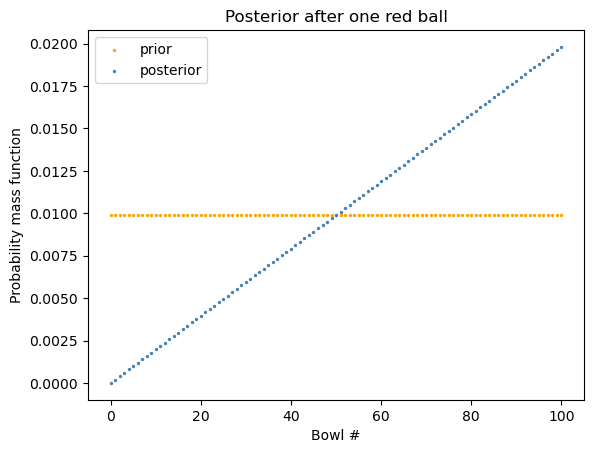

In [145]:
#| code-fold: true
x_axis = range(n)
plt.scatter(x = x_axis, y = prior, 
            label="prior", color="orange", s = 2)
plt.scatter(x = x_axis, y = posterior, 
            label="posterior", color="steelblue", s = 2)
plt.xlabel("Bowl #")
plt.ylabel("Probability mass function")
plt.legend()
plt.title("Posterior after one red ball")
plt.show()

假如我们把红球放回，从 **同一只碗** 中再次随机抽球，我们又抽到了一颗红球，请问这第二颗红球来自碗 $x$ 的概率是多少？

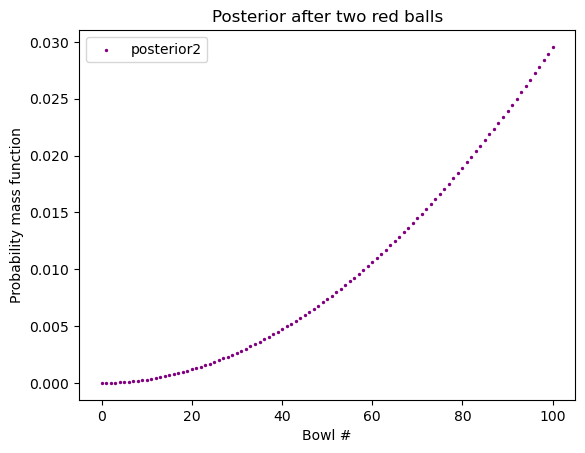

In [146]:
#| code-fold: true
posterior2 = normalize_array(posterior * likelihood_red)
plt.scatter(x = x_axis, y = posterior2, 
            label="posterior2", color="purple", s = 2)
plt.xlabel("Bowl #")
plt.ylabel("Probability mass function")
plt.legend()
plt.title("Posterior after two red balls")
plt.show()

接着，我们把红球放回，在**同一只碗** 中再次随机抽球，这次我们抽到了一颗白球，请问这第三颗白球来自碗 $x$ 的概率是多少？

这时的 prior 仍是关于「碗」的。这里说了是「同一只碗」，但我们并不确定同一只碗到底是哪只碗，这是由第二次抽取决定的。第二次的 posterior 就是我们这次的 prior。

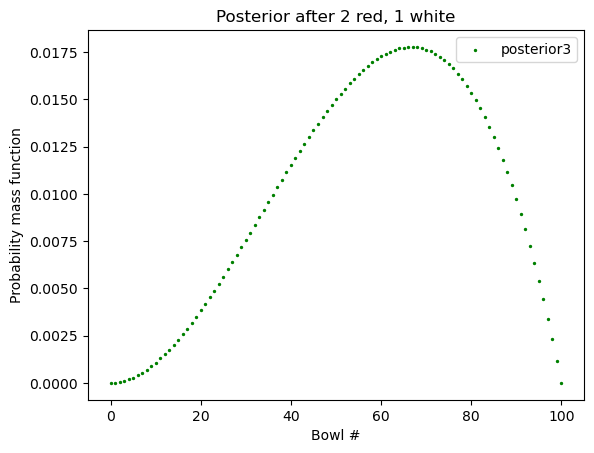

In [147]:
#| code-fold: true
likelihood_white = np.array([1 - x for x in likelihood_red])
posterior3 = normalize_array(posterior2 * likelihood_white)
plt.scatter(x = x_axis, y = posterior3, 
            label="posterior3", color="green", s = 2)
plt.xlabel("Bowl #")
plt.ylabel("Probability mass function")
plt.legend()
plt.title("Posterior after 2 red, 1 white")
plt.show()

这里，PMF (probability mass function) 的最高点叫做 "maximum a posterior probability" (MAP).

如果我们想知道这里的最高点是哪一只碗：

In [148]:
max_index = np.argmax(posterior3)
print("最高点出现在碗 #", max_index)

最高点出现在碗 # 67


## 顺序重要吗？

我们看到 `posterior3` 是如此得出的：

```py
all_ones = [1]*n
prior = normalize_array(all_ones)
posterior = normalize_array(prior * likelihood_red)
posterior2 = normalize_array(posterior * likelihood_red)
posterior3 = normalize_array(posterior2 * likelihood_white)
```

我们注意到每次我们都用到了 `normalize_array()`，但这大可不必，只需要最后一次即可。我们甚至连

```{r}
all_ones = [1]*n
prior = normalize_array(all_ones)
```

都没必要。

这里 `prior`, `likelihood_red`, `likelihood_white`, 和每个 `posterior` 都是一组数 (array)。

另外，如果抽到的顺序不是 红-红-白，而是白-红-红，结果会一样。

总结来说，我们需要证明的是上面算出来的 posterior3 和下面算出来的应该是一样的：

```
posterior3_new = all_ones * likelihood_white * likelihood_red * likelihood_red # 顺序变了
posterior3_new = normalize_array(posterior3_new) # 只最后标准化一次，中间没有
```

那我们就来看一下：


In [149]:
posterior3[0:5]

array([0.00000000e+00, 1.18811881e-05, 4.70447045e-05, 1.04770477e-04,
       1.84338434e-04])

In [150]:
posterior3_new = all_ones * likelihood_white * likelihood_red * likelihood_red 
posterior3_new = normalize_array(posterior3_new) 
posterior3_new[0:5]

array([0.00000000e+00, 1.18811881e-05, 4.70447045e-05, 1.04770477e-04,
       1.84338434e-04])

In [151]:
sum(np.isclose(posterior3, posterior3_new)) == len(prior)

True

这就说明，顺序不重要：红-红-白 与 红-白-红、白-红-红 的结果是一样的。

## 总结
我们把一百零一只碗这个问题泛化一下。

假设我们总共有 $n+1$ 只碗：

- 碗 0 中 0/n 是红球
- 碗 1 中 1/n 是红球
- 碗 2 中 2/n 是红球\
...
- 碗 n 中 n/n 是红球

每一只碗中不是红球就是白球，且每只碗中球的总数相同。我们随机取一只碗，有放回地在这只碗中抽取球。我们把事件 T 定义为：

>共抽取 m 次，其中抽中红球 r 次，白球 w 次

那么事件 T 发生的概率是多少？

In [152]:
def update_bowls_pmf(n, r, w):
    """
    n: 总共几只碗
    r: 红球
    w: 白球
    """
    priors = np.array([1]*n)
    priors = normalize_array(priors)
    likelihood_red = np.array([i/(n-1) for i in range(n)])
    likelihood_white = np.array([1- i for i in likelihood_red])
    likelihood = {
        "red": likelihood_red,
        "white": likelihood_white
    }
    dataset = ["red"]*r + ["white"]*w
    for data in dataset:
        priors *= likelihood[data]
        
    posterior = normalize_array(priors)
    return posterior

In [153]:
new_posterior = update_bowls_pmf(n=101, r=2, w=1)
new_posterior[0:5]

array([0.00000000e+00, 1.18811881e-05, 4.70447045e-05, 1.04770477e-04,
       1.84338434e-04])

In [154]:
# 我们来检测一下 红-红-白 是否和最原始的计算结果一致：
new_posterior = update_bowls_pmf(n=101, r=2, w=1)
sum(np.isclose(new_posterior, posterior3_new)) == len(prior)

True

## 揭晓面纱

你可能会问，上面的方法有什么用。那我问你另一个问题。假设，我不告诉你这些碗，只说这些：

>从一只装有红球和白球的碗中，随机有放回地抽球，每次抽一颗，抽了三次，这三次的结果是：红球，红球，白球。请问这只碗中的红球比例最有可能是多少？

你就会知道，上面的结果可以回答这个问题。

当然你也可以如此解决：

In [155]:
def y(x):
    # 假设红球比例是x
    return x**2*(1-x)

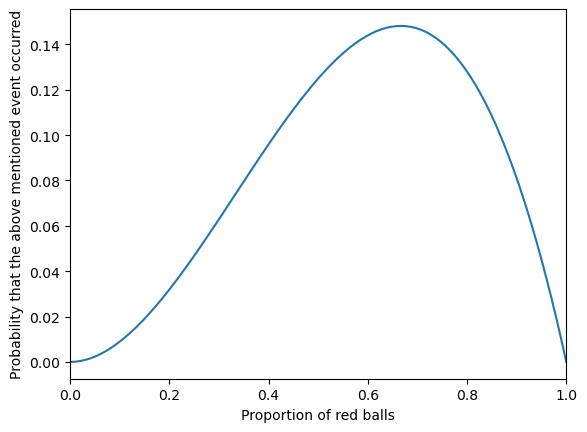

In [156]:
x = np.linspace(0, 1, 100)
plt.plot(x, y(x))
plt.xlabel("Proportion of red balls")
plt.ylabel("Probability that the above mentioned event occurred")
plt.xlim(0, 1)
plt.show()

In [157]:
from scipy.optimize import minimize_scalar
def y(x):
    return -x**2*(1-x)
result = minimize_scalar(y, bounds=(0,1), method="bounded")
result

 message: Solution found.
 success: True
  status: 0
     fun: -0.14814814814787028
       x: 0.666666139518174
     nit: 10
    nfev: 10

In [158]:
# 所以结果是：
max_value = -result.fun
optimal_x = result.x 
optimal_x, max_value

(0.666666139518174, 0.14814814814787028)

也就是说，当红球比例是 $66.7\%$ （也就是 $\frac{2}{3}$） 时，上述事件发生的概率最高。

这和我们上面得到的 $67\%$ 是一个道理：这三颗球来自碗 67 的概率最高。这也就是说，这三颗球来自红球比例为 $67\%$ 的那只碗的概率最高。

其实这和我们的直觉是一样的，因为三次的结果是两次为红球，那最有可能红球的比利是三分之二。